In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [18]:
df=pd.read_csv("/BTC-USD.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,9553.125977,6914.996094,9350.529297,9350.529297,852872174496
1,2020-02-01,9346.357422,10457.626953,8492.932617,8599.508789,8599.508789,1163376492768
2,2020-03-01,8599.758789,9167.695313,4106.980957,6438.644531,6438.644531,1290442059648
3,2020-04-01,6437.319336,9440.650391,6202.373535,8658.553711,8658.553711,1156127164831
4,2020-05-01,8672.782227,9996.743164,8374.323242,9461.058594,9461.058594,1286368141507


In [19]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       57 non-null     object 
 1   Open       57 non-null     float64
 2   High       57 non-null     float64
 3   Low        57 non-null     float64
 4   Close      57 non-null     float64
 5   Adj Close  57 non-null     float64
 6   Volume     57 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       57 non-null     datetime64[ns]
 1   Open       57 non-null     float64       
 2   High       57 non-null     float64       
 3   Low        57 non-null     float64       
 4   Close      57 non-null     float64       
 5   Adj Close  57 non-null     float64       
 6   Volume     57 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.2 KB


In [22]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,57,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01
mean,2022-05-01 22:44:12.631578880,33346.000197,38525.567057,29023.565395,34263.494124,34263.494124,9.593530e+11
min,2020-01-01 00:00:00,6437.319336,9167.695313,4106.980957,6438.644531,6438.644531,5.162890e+10
25%,2021-03-01 00:00:00,19633.769531,22673.820313,17619.533203,19784.726563,19784.726563,7.083771e+11
50%,2022-05-01 00:00:00,30471.847656,35150.433594,27070.849609,31792.310547,31792.310547,9.239790e+11
75%,2023-07-01 00:00:00,45159.503906,58330.570313,38521.894531,45538.675781,45538.675781,1.123272e+12
max,2024-09-01 00:00:00,71333.484375,73750.070313,59323.910156,71333.648438,71333.648438,2.267153e+12
std,NaN,18205.841883,20347.653584,15558.009188,18179.545884,18179.545884,4.268646e+11


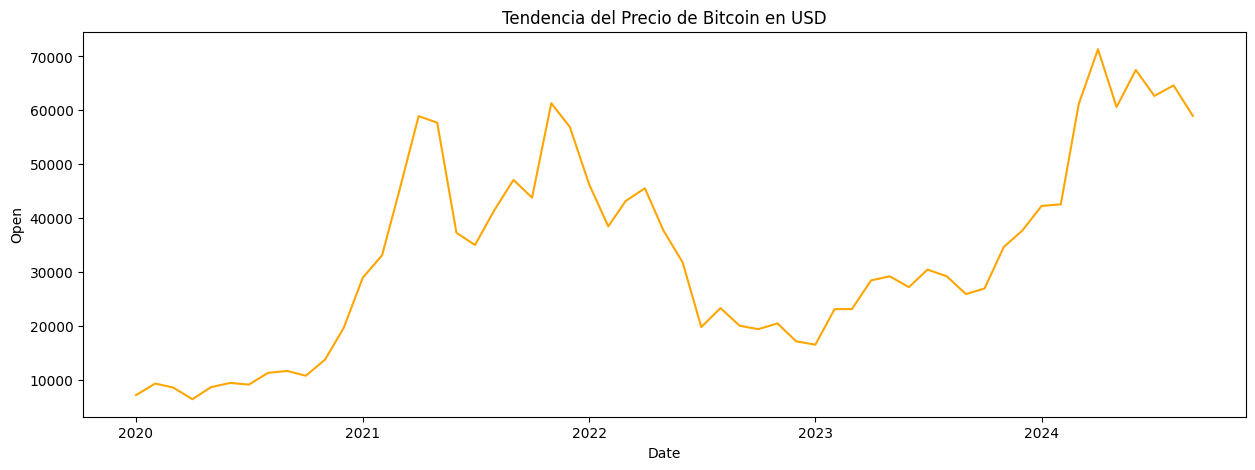

In [ ]:
# prompt: grafica el open por date en linea naranja

plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Open'], color='orange')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Tendencia del Precio de Bitcoin en USD')
plt.show()


In [ ]:
#Creacionnde columnas de mes, dia, semana y ano en base a la fecha de orden
df['OrderDatePeriodDay'] = df['Date'].dt.to_period("D")
df['OrderDatePeriodMonth'] = df['Date'].dt.to_period("M")
df['OrderDatePeriodYear'] = df['Date'].dt.to_period("Y")
df['OrderDatePeriodWeek'] = df['Date'].dt.to_period("W")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  57 non-null     datetime64[ns]
 1   Open                  57 non-null     float64       
 2   High                  57 non-null     float64       
 3   Low                   57 non-null     float64       
 4   Close                 57 non-null     float64       
 5   Adj Close             57 non-null     float64       
 6   Volume                57 non-null     int64         
 7   OrderDatePeriodDay    57 non-null     period[D]     
 8   OrderDatePeriodMonth  57 non-null     period[M]     
 9   OrderDatePeriodYear   57 non-null     period[A-DEC] 
 10  OrderDatePeriodWeek   57 non-null     period[W-SUN] 
dtypes: datetime64[ns](1), float64(5), int64(1), period[A-DEC](1), period[D](1), period[M](1), period[W-SUN](1)
memory usage: 5.0 KB


In [ ]:
#dataset para agrupar el precio por Año y Mes
dfw=df[['OrderDatePeriodMonth','Open']].groupby('OrderDatePeriodMonth').sum()
dfw_forecast = dfw
dfw.index

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09'],
            dtype='period[M]', name='OrderDatePeriodMonth')

<Axes: title={'center': 'Precio de Apertura de Bitcoin en USD por Año Mes'}, xlabel='Año-Mes'>

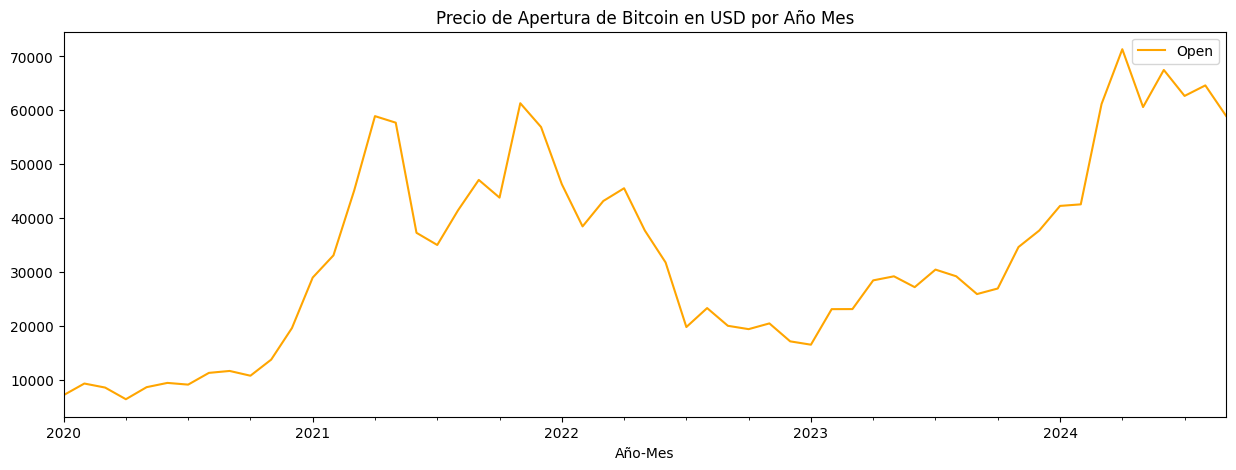

In [ ]:
#Grafico de Precio por Año mes
dfw.plot(kind='line',y='Open',xlabel='Año-Mes',title="Precio de Apertura de Bitcoin en USD por Año Mes",figsize=(15,5),color = "orange")

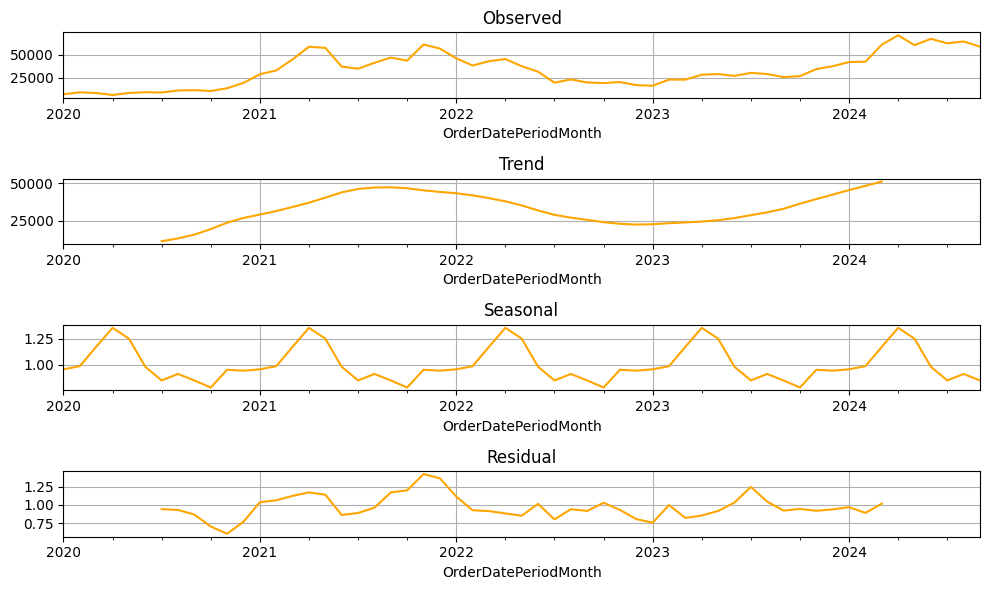

In [ ]:
decompose_result = seasonal_decompose(df_decompose['Open'], model='multiplicative')

# Crear una figura y un conjunto de subgráficas con tamaño específico
fig, (observed, trend, seasonal, residual) = plt.subplots(4, 1, figsize=(10, 6))

# Graficar cada componente con líneas naranja
decompose_result.observed.plot(ax=observed, color='orange')
observed.set_title('Observed')
observed.grid(True)

decompose_result.trend.plot(ax=trend, color='orange')
trend.set_title('Trend')
trend.grid(True)

decompose_result.seasonal.plot(ax=seasonal, color='orange')
seasonal.set_title('Seasonal')
seasonal.grid(True)

decompose_result.resid.plot(ax=residual, color='orange')
residual.set_title('Residual')
residual.grid(True)

# Ajustar el layout para que no se sobrepongan los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()